![BTS](img/Logo-BTS.jpg)

# Session 13: Exploratory Data Analysis

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-11-16)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/13-Exploratory-Data-Analysis.ipynb)

## Exercise 1: EDA on grocery sales dataset (I)

We will perform an exploratory data analysis of the "Corporación Favorita Grocery Sales Forecasting" Kaggle competition dataset:

https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data

You already have a sample to play with.

1. Load all the datasets, with attention to: dates, _unique_ indexes, numerical variables that are in fact categorical variables
2. Count the categorical variables: how many unique stores, items, product families... are there?
3. Try to find out what families of products have integer `unit_sales` and which ones have a floating point value, and plot the overall distribution of both
4. Are there any days without transactions/sales? Is this data consistent with the vacations?
5. Visualize the transactions volume by year and month in one single plot. Do you observe anything special?
6. Visualize the transactions volume by day of week. Is there a weekday/weekend pattern in the data?
7. Visualize the transactions by day of the month. Do you observe any strange peaks? Try to figure out what's going on.
8. "A magnitude 7.8 earthquake struck Ecuador on April 16, 2016". Visualize the transactions volume by day of April every year. Is the earthquake visible?

In [1]:
import pandas as pd

In [ ]:
pd.read_csv()

In [39]:
train = pd.read_csv(
    "data/favorita/train_sample.csv",
    parse_dates=['date'],
    index_col='id',
    dtype={
        'store_nbr': object,
        'item_nbr': object,
    },
)
train['onpromotion'] = train['onpromotion'].replace({0.0: False, 1.0: True})
#train['store_nbr'] = train['store_nbr'].astype(object)
#train['item_nbr'] = train['item_nbr'].apply(str)

train.head()

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
4954,2013-01-02,5,105737,6.0,NaN
4958,2013-01-02,5,108698,1.0,NaN
4961,2013-01-02,5,108797,13.0,NaN
4963,2013-01-02,5,111223,14.0,NaN
4964,2013-01-02,5,112830,1.0,NaN


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5533758 entries, 4954 to 125489299
Data columns (total 5 columns):
date           datetime64[ns]
store_nbr      object
item_nbr       object
unit_sales     float64
onpromotion    object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 253.3+ MB


In [36]:
train.describe().round(2)

,unit_sales
count,5533758.00
mean,7.53
std,17.39
min,-989.00
25%,2.00
50%,4.00
75%,8.00
max,10031.00


In [37]:
train.describe(include='object')

,store_nbr,item_nbr,onpromotion
count,5533758,5533758,4585631
unique,11,803,2
top,8,265559,False
freq,648314,17551,4246124


In [10]:
train.index.is_unique

True

In [7]:
train.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion           float64
dtype: object

In [4]:
train['onpromotion'].unique()

array([nan,  0.,  1.])

In [5]:
train['onpromotion'].astype(bool)

0           True
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
5533728    False
5533729    False
5533730    False
5533731    False
5533732    False
5533733    False
5533734    False
5533735    False
5533736    False
5533737    False
5533738    False
5533739    False
5533740    False
5533741    False
5533742    False
5533743    False
5533744    False
5533745    False
5533746     True
5533747    False
5533748    False
5533749    False
5533750    False
5533751    False
5533752    False
5533753    False
5533754    False
5533755    Fal

In [3]:
train.describe()

,id,store_nbr,item_nbr,unit_sales,onpromotion
count,5.533758e+06,5.533758e+06,5.533758e+06,5.533758e+06,4.585631e+06
mean,6.263212e+07,2.236888e+01,1.002548e+06,7.531944e+00,7.403714e-02
std,3.602814e+07,1.636103e+01,5.187728e+05,1.739072e+01,2.618314e-01
min,4.954000e+03,5.000000e+00,1.055760e+05,-9.890000e+02,0.000000e+00
25%,3.147049e+07,8.000000e+00,5.758760e+05,2.000000e+00,0.000000e+00
50%,6.265349e+07,1.500000e+01,1.012473e+06,4.000000e+00,0.000000e+00
75%,9.362768e+07,2.800000e+01,1.354390e+06,8.000000e+00,0.000000e+00
max,1.254893e+08,5.000000e+01,2.127114e+06,1.003100e+04,1.000000e+00


## Exercise 2: EDA on grocery sales dataset (II)

In groups, ask your own questions about the data. Ideas:

* Are the products on promotion more successful?
* Negative transactions (returns): which stores? Which products or families? Which days?
* Adjust for holidays when displaying trend by day of week
* Perishable items in general and in the vicinity of the earthquake
* Do the type and cluster of the stores have an effect on the volume of transactions?
* Does any of the product families exhibit a distinct pattern?

Link to the data:

https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data

Ideas:

* Transactions by years and months
* Transactions by day of the week
* Transactions by day of the month: what happens in those peaks?
* How do we correct for holidays, day of the week?
* As the competition description says, does the payslip day influence the volume of transactions?
* Transactions during the month of April by year

More ideas:

* **To know whether some variable is useful or not!**
* Are the products on promotion more successful?
* Negative transactions (returns): which stores? Which products or families? Which days?
* Consider holidays when displaying trend by day of week
* Variable creation: weekday/weekend/holiday?
* Perishable items in general and in the vicinity of the earthquake (near/far)
* Do the type and cluster of the stores have an effect on the volume of transactions?
* Does any of the product families exhibit a distinct pattern?

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
DATA_PATH = "/home/juanlu/BTS/dsf/sessions/data/favorita/"

In [40]:
s =  data['onpromotion']

NameError: name 'data' is not defined

In [41]:
data = pd.read_csv(
    os.path.join(DATA_PATH, "train_sample.csv"),
    dtype={
        'store_nbr': str,  # or "category"
        'item_nbr': str,  # or "category"
    },
    index_col="id",
    parse_dates=['date'],
)
data['onpromotion'] = data['onpromotion'].replace({0.0: False, 1.0: True})
data.head()

NameError: name 'os' is not defined

In [4]:
data.dtypes

date           datetime64[ns]
store_nbr              object
item_nbr               object
unit_sales            float64
onpromotion            object
dtype: object

In [11]:
data.select_dtypes(include=np.number).head()

,unit_sales
id,
4954,6.0
4958,1.0
4961,13.0
4963,14.0
4964,1.0


In [8]:
data.describe(include="all")

,date,store_nbr,item_nbr,unit_sales,onpromotion
count,5533758,5533758,5533758,5.533758e+06,4585631
unique,1679,11,803,NaN,2
top,2016-12-18 00:00:00,8,265559,NaN,False
freq,5057,648314,17551,NaN,4246124
first,2013-01-02 00:00:00,NaN,NaN,NaN,NaN
last,2017-08-15 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,7.531944e+00,NaN
std,NaN,NaN,NaN,1.739072e+01,NaN
min,NaN,NaN,NaN,-9.890000e+02,NaN
25%,NaN,NaN,NaN,2.000000e+00,NaN


In [97]:
stores_ids = data['store_nbr'].unique()
stores_ids

array(['5', '6', '8', '12', '14', '15', '27', '28', '48', '50', '20'],
      dtype=object)

In [224]:
data[(data['date'].dt.month == 12) & (data['date'].dt.day.isin([24, 25]))].head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
15965581,2013-12-24,5,108079,1.0,NaN
15965585,2013-12-24,5,108797,6.0,NaN
15965586,2013-12-24,5,111223,15.0,NaN
15965588,2013-12-24,5,114790,42.0,NaN
15965594,2013-12-24,5,115720,3.0,NaN


In [238]:
us = data.loc[(data['date'] == '2013-01-02') & (data['store_nbr'] == '12'), 'unit_sales']
us.head()

id
12050    30.0
12053     2.0
12057     7.0
12058     2.0
12060    30.0
Name: unit_sales, dtype: float64

In [245]:
data[(data['date'] == '2013-01-02') & (data['store_nbr'] == '12') & (us - us.astype(int)) != 0.0]

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
12419,2013-01-02,12,584123,1.206,NaN
12420,2013-01-02,12,584125,4.987,NaN
12427,2013-01-02,12,587104,4.131,NaN
12475,2013-01-02,12,699688,12.902,NaN
12536,2013-01-02,12,819227,5.291,NaN
12539,2013-01-02,12,820006,3.994,NaN


In [243]:
us[(us - us.astype(int)) != 0.0]

id
12419     1.206
12420     4.987
12427     4.131
12475    12.902
12536     5.291
12539     3.994
Name: unit_sales, dtype: float64

In [234]:
data.groupby(['date', 'store_nbr'])['unit_sales'].sum().reset_index().sort_values(['date', 'store_nbr']).head()

,date,store_nbr,unit_sales
0,2013-01-02,12,1041.511
1,2013-01-02,14,1410.227
2,2013-01-02,15,1054.283
3,2013-01-02,27,1120.483
4,2013-01-02,28,807.330


In [227]:
trans.sort_values(['date', 'store_nbr'])

,date,store_nbr,transactions
5,2013-01-02,5,1903
6,2013-01-02,6,2143
8,2013-01-02,8,3250
12,2013-01-02,12,1362
14,2013-01-02,14,2002
15,2013-01-02,15,1622
24,2013-01-02,27,1386
25,2013-01-02,28,950
42,2013-01-02,48,3397
44,2013-01-02,50,3077


In [71]:
data['onpromotion'].unique()

array([nan, False, True], dtype=object)

In [81]:
data.dtypes

date           datetime64[ns]
store_nbr              object
item_nbr               object
unit_sales            float64
onpromotion            object
dtype: object

In [83]:
data.describe(include='all')

,date,store_nbr,item_nbr,unit_sales,onpromotion
count,5533758,5533758,5533758,5.533758e+06,4585631
unique,1679,11,803,NaN,2
top,2016-12-18 00:00:00,8,265559,NaN,False
freq,5057,648314,17551,NaN,4246124
first,2013-01-02 00:00:00,NaN,NaN,NaN,NaN
last,2017-08-15 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,7.531944e+00,NaN
std,NaN,NaN,NaN,1.739072e+01,NaN
min,NaN,NaN,NaN,-9.890000e+02,NaN
25%,NaN,NaN,NaN,2.000000e+00,NaN


In [89]:
by_date_and_store = data.groupby(["date", "store_nbr"]).count()
by_date_and_store

item_nbr  unit_sales  onpromotion
date       store_nbr                                   
2013-01-02 12              139         139            0
           14              130         130            0
           15              131         131            0
           27              182         182            0
           28              140         140            0
           48              222         222            0
           5               201         201            0
           50              217         217            0
           6               214         214            0
           8               240         240            0
2013-01-03 12              125         125            0
           14              124         124            0
           15              132         132            0
           27              145         145            0
           28              136         136            0
           48              208         208            0
           5               202         202            0
           50              208         208            0
           6               215         215            0
           8               225         225            0
2013-01-04 12              125         125            0
           14              137         137            0
           15              120         120            0
           27              161         161            0
           28              113         113            0
           48              221         221            0
           5               193         193            0
           50              200         200            0
           6               202         202            0
           8               231         231            0
...                        ...         ...          ...
2017-08-13 20              446         446          446
           27              446         446          446
           28              415         415          415
           48              536         536          536
           5               399         399          399
           50              503         503          503
           6               492         492          492
           8               509         509          509
2017-08-14 12              316         316          316
           14              290         290          290
           15              326         326          326
           20              411         411          411
           27              417         417          417
           28              355         355          355
           48              492         492          492
           5               399         399          399
           50              493         493          493
           6               443         443          443
           8               484         484          484
2017-08-15 12              301         301          301
           14              284         284          284
           15              300         300          300
           20              396         396          396
           27              415         415          415
           28              394         394          394
           48              499         499          499
           5               387         387          387
           50              489         489          489
           6               433         433          433
           8               477         477          477

[17603 rows x 3 columns]

In [92]:
by_date_and_store.index.levels[0]

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09',
               '2013-01-10', '2013-01-11',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1679, freq=None)

In [246]:
trans_orig = pd.read_csv(
    os.path.join(DATA_PATH, "transactions.csv"),
    parse_dates=['date'],
)

In [256]:
data[(data['date'].dt.month == 12) & (data['date'].dt.day.isin([25]))]

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,


In [253]:
trans_orig[(trans_orig['date'].dt.month == 12) & (trans_orig['date'].dt.day.isin([25]))]

,date,store_nbr,transactions


In [99]:
trans = pd.read_csv(
    os.path.join(DATA_PATH, "transactions.csv"),
    parse_dates=['date'],
)
trans = trans[trans['store_nbr'].isin(stores_ids)]
trans.head()

,date,store_nbr,transactions
5,2013-01-02,5,1903
6,2013-01-02,6,2143
8,2013-01-02,8,3250
12,2013-01-02,12,1362
14,2013-01-02,14,2002


In [129]:
by_day = trans.groupby("date")['transactions'].sum().to_frame()
by_day.head()

,transactions
date,
2013-01-02,21092
2013-01-03,17893
2013-01-04,17589
2013-01-05,21648
2013-01-06,21257


In [145]:
by_day['year'] = by_day.index.year
by_day['month'] = by_day.index.month

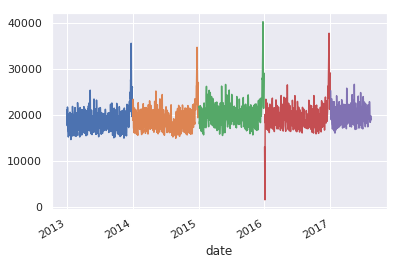

In [125]:
by_day.groupby(by_day.index.year).plot();

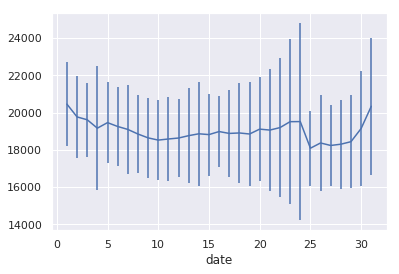

In [192]:
by_day_of_month = by_day.groupby(by_day.index.day)
by_day_of_month['transactions'].mean().plot(yerr=by_day_of_month['transactions'].std())

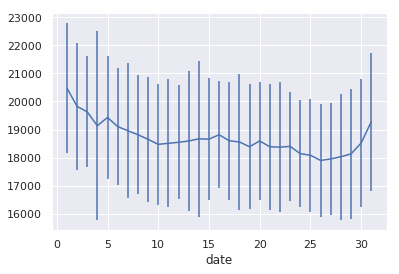

In [196]:
by_day_of_month_no_december = by_day[by_day['month'] != 12]
by_day_of_month_no_december = by_day_of_month_no_december.groupby(by_day_of_month_no_december.index.day)
by_day_of_month_no_december['transactions'].mean().plot(yerr=by_day_of_month_no_december['transactions'].std())

In [208]:
by_day_of_month_no_december['transactions'].mean().index + 0.2

Float64Index([ 1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2, 11.2,
              12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2, 22.2,
              23.2, 24.2, 25.2, 26.2, 27.2, 28.2, 29.2, 30.2, 31.2],
             dtype='float64', name='date')

In [214]:
mnd = by_day_of_month_no_december['transactions'].mean()
mnd.index = mnd.index + 0.5

by_day_of_month_no_december['transactions'].mean().

Float64Index([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
              12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
              23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5],
             dtype='float64', name='date')

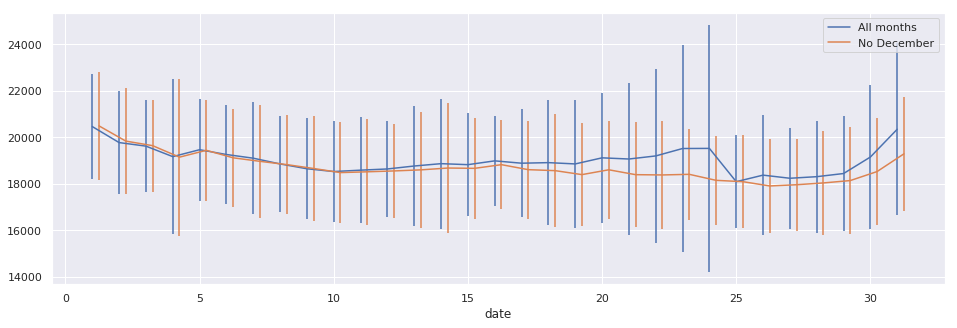

In [220]:
fig, ax = plt.subplots(figsize=(16, 5))

mnd = by_day_of_month_no_december['transactions'].mean()
mnd.index = mnd.index + 0.25

snd = by_day_of_month_no_december['transactions'].std()
snd.index = mnd.index

by_day_of_month['transactions'].mean().plot(yerr=by_day_of_month['transactions'].std(), ax=ax, label="All months", legend=True)
mnd.plot(yerr=snd, ax=ax, label="No December", legend=True);

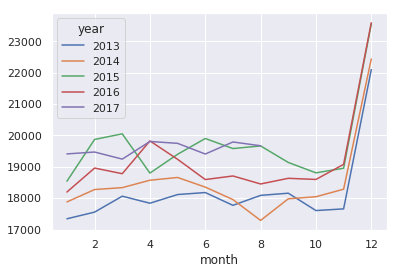

In [379]:
by_day.pivot_table('transactions', index='month', columns='year').plot();

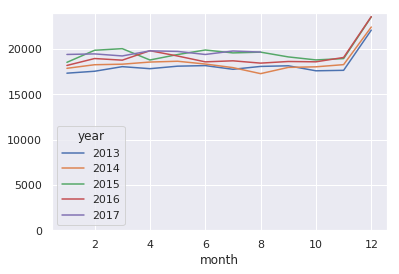

In [380]:
by_day.pivot_table('transactions', index='month', columns='year').plot(ylim=(0, 24000));

In [187]:
by_day['day'] = by_day.index.day

In [191]:
by_day[by_day.day.isin([23, 24, 25, 26]) & by_day.month == 12]

,transactions,year,month,day
date,,,,


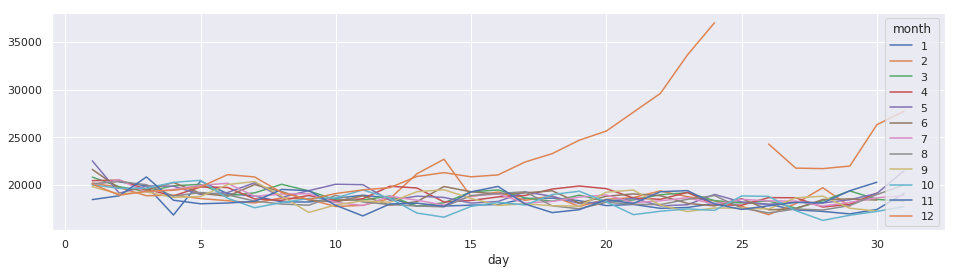

In [189]:
by_day.pivot_table('transactions', index='day', columns='month').plot(figsize=(16, 4));

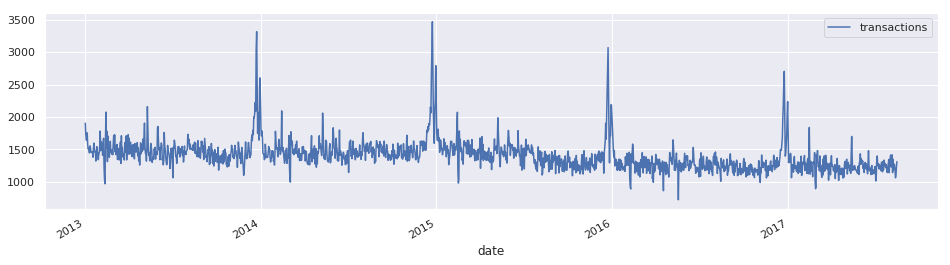

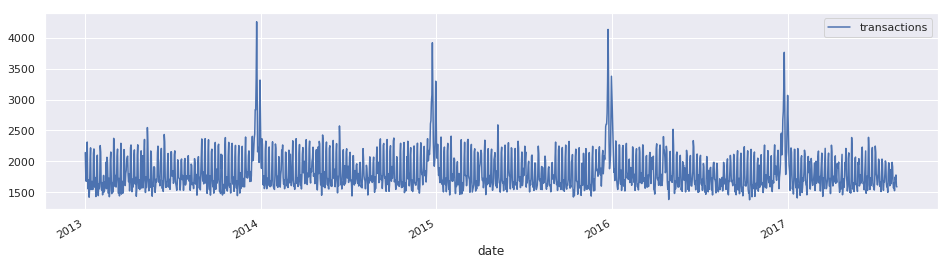

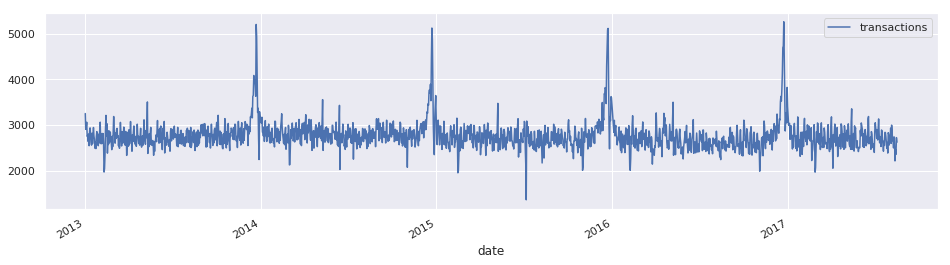

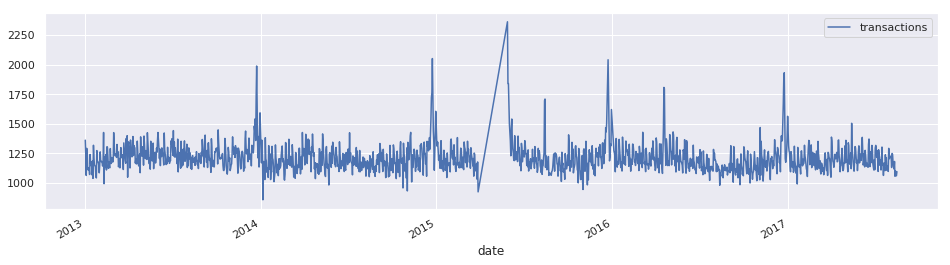

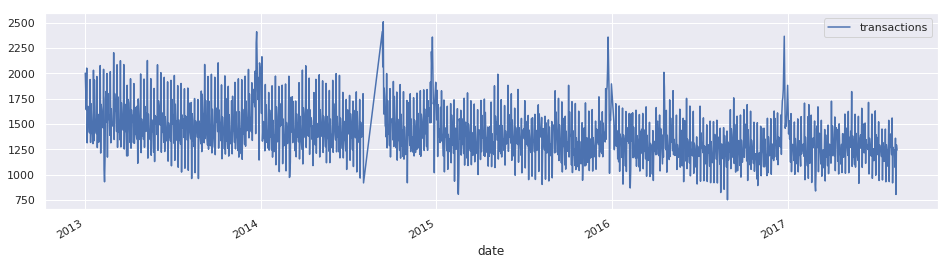

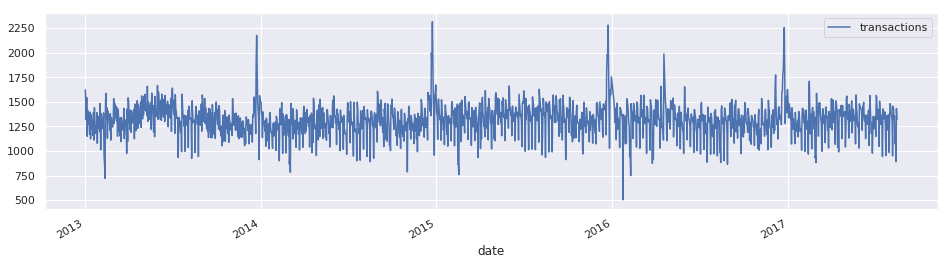

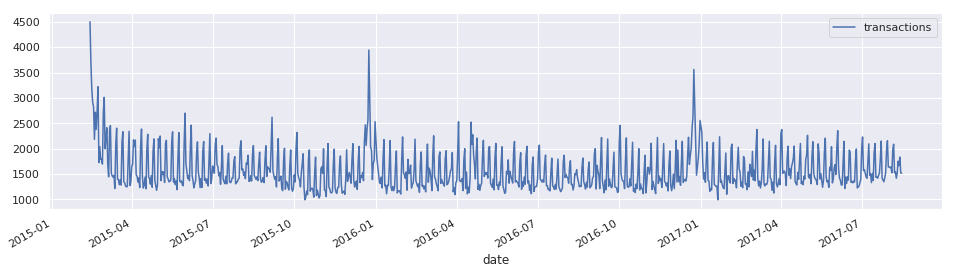

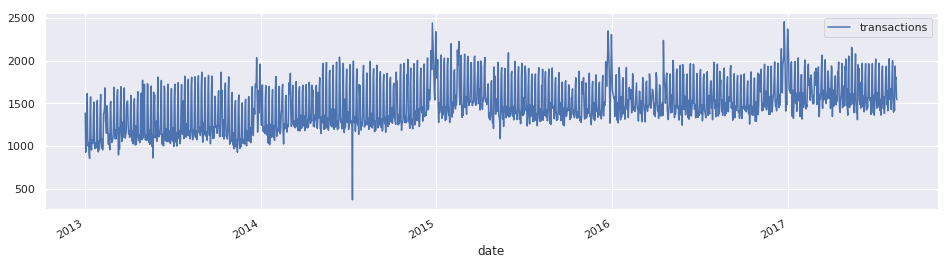

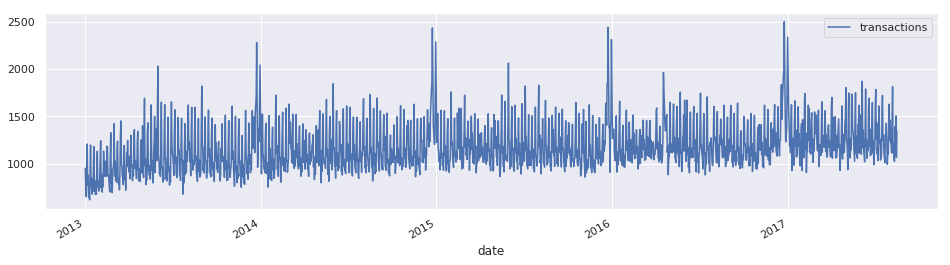

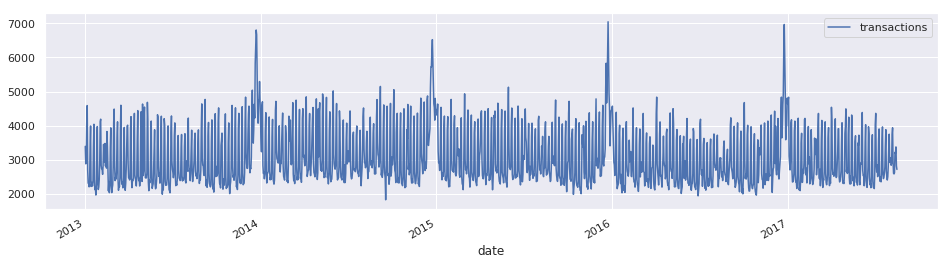

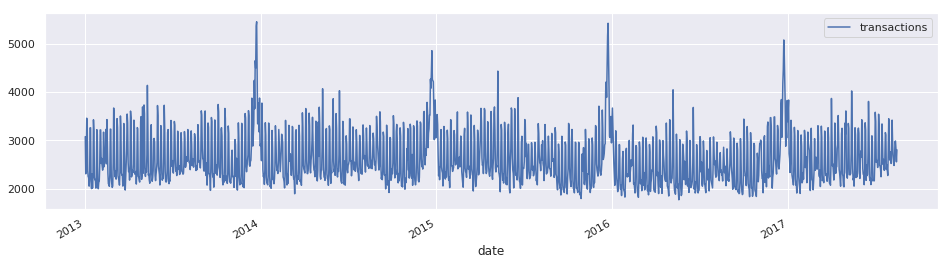

In [118]:
trans.groupby("store_nbr").plot(x='date', y='transactions', figsize=(16, 4));

In [363]:
oil.index.weekday_name

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='date', length=1218)

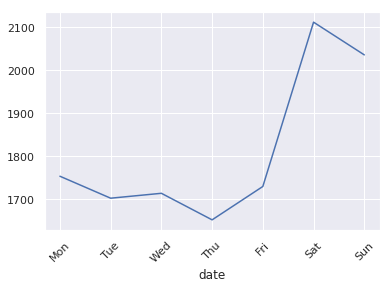

In [374]:
ax = trans.groupby(trans['date'].dt.weekday)['transactions'].mean().plot()
ax.set_xticklabels([
    '', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
], rotation=45);

In [147]:
oil = pd.read_csv(
    os.path.join(DATA_PATH, "oil.csv"),
    parse_dates=['date'],
    index_col='date',
)
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


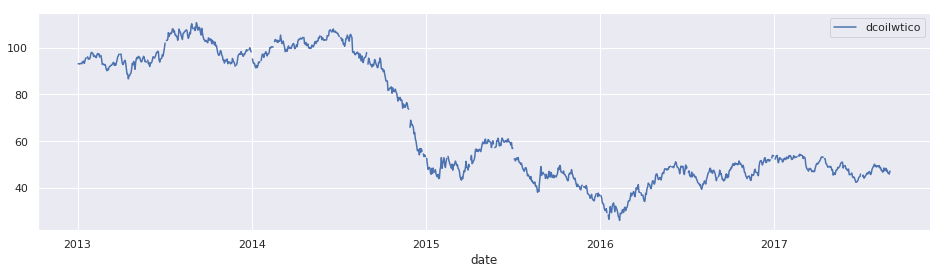

In [166]:
fig, ax = plt.subplots(figsize=(16, 4))

oil.plot(ax=ax)
#oil.resample("M").mean().plot(ax=ax);
#oil.rolling(5, center=True).mean().plot(ax=ax);

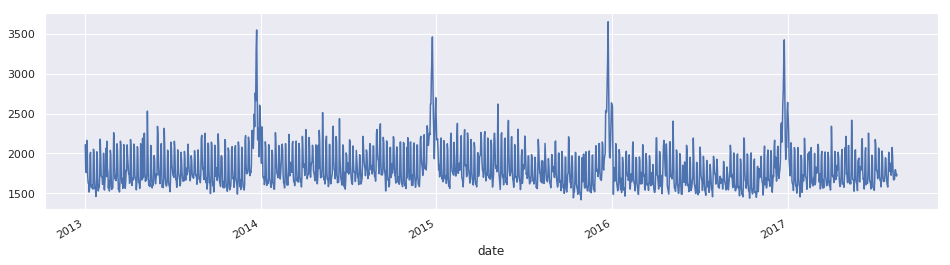

In [378]:
fig, ax = plt.subplots(figsize=(16, 4))

trans.groupby('date')['transactions'].mean().plot(ax=ax)

In [167]:
hols = pd.read_csv(
    os.path.join(DATA_PATH, "holidays_events.csv"),
    parse_dates=['date'],
    index_col='date',
)
hols.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [171]:
hols[hols['type'] == 'Transfer']

,type,locale,locale_name,description,transferred
date,,,,,
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False


In [178]:
hols[hols['type'] == 'Work Day']

,type,locale,locale_name,description,transferred
date,,,,,
2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [179]:
_.index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday'], dtype='object', name='date')

In [170]:
hols[hols['transferred'] == True]

,type,locale,locale_name,description,transferred
date,,,,,
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True


In [168]:
hols['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [169]:
hols['transferred'].unique()

array([False,  True])

In [262]:
items = pd.read_csv(
    os.path.join(DATA_PATH, "items.csv"),
    index_col='item_nbr',
)
items.head()

,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,0
99197,GROCERY I,1067,0
103501,CLEANING,3008,0
103520,GROCERY I,1028,0
103665,BREAD/BAKERY,2712,1


In [381]:
items['family'].unique()

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES',
       'SEAFOOD', 'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY',
       'HARDWARE', 'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'],
      dtype=object)

In [286]:
stores = pd.read_csv(
    os.path.join(DATA_PATH, "stores.csv"),
    index_col="store_nbr",
)
stores = stores[stores.index.isin(stores_ids)]
stores.head()

,city,state,type,cluster
store_nbr,,,,
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
8,Quito,Pichincha,D,8
12,Latacunga,Cotopaxi,C,15
14,Riobamba,Chimborazo,C,7


In [268]:
stores['state'].unique()

array(['Santo Domingo de los Tsachilas', 'Pichincha', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Guayas', 'Tungurahua'], dtype=object)

In [261]:
stores.describe()

,cluster
count,11.000000
mean,9.727273
std,4.859854
min,1.000000
25%,6.500000
50%,10.000000
75%,14.000000
max,15.000000


In [263]:
earthquake_date = pd.Timestamp?

In [264]:
earthquake_date = pd.Timestamp("2016-04-16")
earthquake_date

Timestamp('2016-04-16 00:00:00')

In [272]:
april_trans = trans[trans['date'].dt.month == 4].copy()
april_trans.head()

,date,store_nbr,transactions
4099,2013-04-01,5,1725
4100,2013-04-01,6,1780
4102,2013-04-01,8,2845
4106,2013-04-01,12,1313
4108,2013-04-01,14,1742


In [283]:
april_trans.head()

,date,store_nbr,transactions,year,day
4099,2013-04-01,5,1725,2013,1
4100,2013-04-01,6,1780,2013,1
4102,2013-04-01,8,2845,2013,1
4106,2013-04-01,12,1313,2013,1
4108,2013-04-01,14,1742,2013,1


In [289]:
stores['near_earthquake'] = False
stores.loc[
    stores['state'].isin(['Santo Domingo de los Tsachilas', 'Pichincha', 'Imbabura']),
    'near_earthquake'
] = True
stores.head()

,city,state,type,cluster,near_earthquake
store_nbr,,,,,
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,True
6,Quito,Pichincha,D,13,True
8,Quito,Pichincha,D,8,True
12,Latacunga,Cotopaxi,C,15,False
14,Riobamba,Chimborazo,C,7,False


In [290]:
april_trans.head()

,date,store_nbr,transactions,year,day
4099,2013-04-01,5,1725,2013,1
4100,2013-04-01,6,1780,2013,1
4102,2013-04-01,8,2845,2013,1
4106,2013-04-01,12,1313,2013,1
4108,2013-04-01,14,1742,2013,1


In [292]:
april_trans = april_trans.join(stores['near_earthquake'], on="store_nbr")
april_trans.head()

,date,store_nbr,transactions,year,day,near_earthquake
4099,2013-04-01,5,1725,2013,1,True
4100,2013-04-01,6,1780,2013,1,True
4102,2013-04-01,8,2845,2013,1,True
4106,2013-04-01,12,1313,2013,1,False
4108,2013-04-01,14,1742,2013,1,False


In [297]:
april_trans['year'] = april_trans['date'].dt.year
april_trans['day'] = april_trans['date'].dt.day
april_trans['weekday'] = april_trans['date'].dt.weekday

In [298]:
april_trans.head()

,date,store_nbr,transactions,year,day,near_earthquake,weekday
4099,2013-04-01,5,1725,2013,1,True,0
4100,2013-04-01,6,1780,2013,1,True,0
4102,2013-04-01,8,2845,2013,1,True,0
4106,2013-04-01,12,1313,2013,1,False,0
4108,2013-04-01,14,1742,2013,1,False,0


In [303]:
april_trans[april_trans['year'] == 2013].head()

,date,store_nbr,transactions,year,day,near_earthquake,weekday
4099,2013-04-01,5,1725,2013,1,True,0
4100,2013-04-01,6,1780,2013,1,True,0
4102,2013-04-01,8,2845,2013,1,True,0
4106,2013-04-01,12,1313,2013,1,False,0
4108,2013-04-01,14,1742,2013,1,False,0


In [305]:
april_trans[april_trans['year'] == 2014].head()

,date,store_nbr,transactions,year,day,near_earthquake,weekday
21095,2014-04-01,5,1433,2014,1,True,1
21096,2014-04-01,6,1907,2014,1,True,1
21098,2014-04-01,8,2921,2014,1,True,1
21102,2014-04-01,12,1292,2014,1,False,1
21104,2014-04-01,14,1604,2014,1,False,1


In [ ]:
april_trans

In [319]:
pd.Timestamp('2014-04-01').weekday() - pd.Timestamp('2013-04-01').weekday()

1

In [342]:
offsets = pd.Series(
    (pd.date_range(april_trans['date'].min(), periods=len(april_trans['year'].unique()), freq='AS-APR').weekday - 
     april_trans['date'].min().weekday()),
    index=april_trans['year'].unique(),
    name='offset',
)

In [346]:
april_trans = april_trans.join(offsets, on='year')
april_trans.head()

,date,store_nbr,transactions,year,day,near_earthquake,weekday,offset
4099,2013-04-01,5,1725,2013,1,True,0,0
4100,2013-04-01,6,1780,2013,1,True,0,0
4102,2013-04-01,8,2845,2013,1,True,0,0
4106,2013-04-01,12,1313,2013,1,False,0,0
4108,2013-04-01,14,1742,2013,1,False,0,0


In [347]:
april_trans['day_corrected'] = april_trans['day'] + april_trans['offset']

In [355]:
april_trans[(april_trans['year'] == 2016) & (13 < april_trans['day']) & (april_trans['day'] < 20)]

,date,store_nbr,transactions,year,day,near_earthquake,weekday,offset,day_corrected
57744,2016-04-14,5,1202,2016,14,True,3,4,18
57745,2016-04-14,6,1611,2016,14,True,3,4,18
57747,2016-04-14,8,2304,2016,14,True,3,4,18
57751,2016-04-14,12,1120,2016,14,False,3,4,18
57753,2016-04-14,14,1237,2016,14,False,3,4,18
57754,2016-04-14,15,1235,2016,14,True,3,4,18
57759,2016-04-14,20,1240,2016,14,True,3,4,18
57766,2016-04-14,27,1354,2016,14,False,3,4,18
57767,2016-04-14,28,1025,2016,14,False,3,4,18
57787,2016-04-14,48,2204,2016,14,True,3,4,18


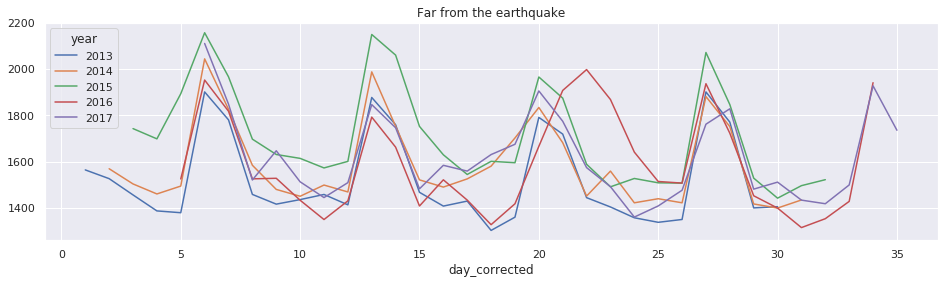

In [349]:
fig, ax = plt.subplots(figsize=(16, 4))

april_trans[
    april_trans['near_earthquake'] == False
].pivot_table('transactions', index='day_corrected', columns='year').plot(ax=ax, title="Far from the earthquake");

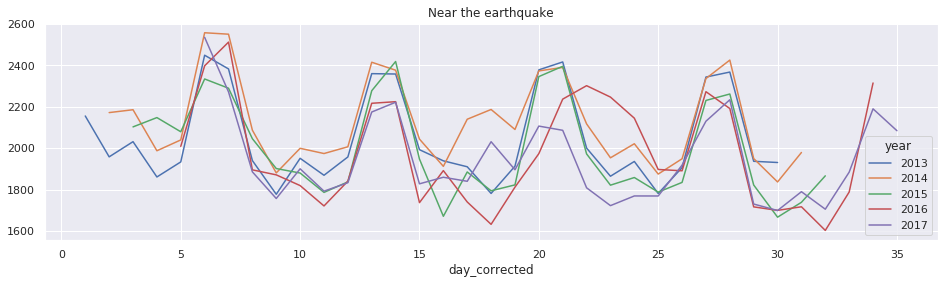

In [357]:
fig, ax = plt.subplots(figsize=(16, 4))

april_trans[
    april_trans['near_earthquake'] == True
].pivot_table('transactions', index='day_corrected', columns='year').plot(ax=ax, title="Near the earthquake");

## Exercise 2: `GET` vs `POST`

1. Use http://postcodes.io/ to compare how to make a request using `GET` or `POST`.

## Exercise 3: Postcode data

1. Register in https://geoapi.es/ (in Spanish, get aid by Google Translate or the Spaniards in the room) to obtain an API key
2. Look for the endpoint that lists all the communities ("comunidades") in Spain 
2. Create a function that receives the name of a community in Spain ("Andalucía", "Cataluña") and retrieves the code (`CCOM`) of that community
3. Create a function that receives the name of a community and lists all its provinces ("provincias")
4. Create a function that receives the name of a province and lists all its zipcodes ("códigos postales")